In [1]:
from textblob import TextBlob
from wordcloud import WordCloud,STOPWORDS
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
plt.style.use('fivethirtyeight')

In [2]:
log = pd.read_csv("jigsaw_google&quora.csv")

In [3]:
log.shape

(530, 2)

In [4]:
log.dtypes

entries_user      object
entries_review    object
dtype: object

In [5]:
log.head()

,entries_user,entries_review
0,Rajat Bhatnagar,I enrolled myself for Product Management PG ce...
1,Neelkamal Deepak,In order to explain my experience of this cour...
2,Saurabh Patil,Jigsaw is good platform to excel your career a...
3,mounika yelaverthi,I had enrolled for IPBA course in collaboratio...
4,Abhimanyu Bhattacharjee,This course gives a great understanding of dif...


In [6]:
df = pd.DataFrame(log['entries_review'] , columns= ['entries_review'])
df['entries_review'] = df['entries_review'].fillna('').apply(str)

In [7]:
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text)# Removing hyperlink
 
 return text


# Clean the tweets
df['entries_review'] = df['entries_review'].apply(cleanTxt)

# Show the cleaned tweets
df

,entries_review
0,I enrolled myself for Product Management PG ce...
1,In order to explain my experience of this cour...
2,Jigsaw is good platform to excel your career a...
3,I had enrolled for IPBA course in collaboratio...
4,This course gives a great understanding of dif...
...,...
525,"Yes, there are quite a few good institutes tha..."
526,Well on the counter part i see below grievance...
527,Jigsaw Academy teaches online courses in Data ...
528,I am currently enrolled to their Full Stack Da...


In [8]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
sentences = word_tokenize("I love to learn NLP \n 'a :(")
#for i in range(len(sentences)):
sentences = [word.lower() for word in sentences if re.match('^[a-zA-Z]+', word)]  
sentences

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prath\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['i', 'love', 'to', 'learn', 'nlp', 'a']

In [9]:
#Removing emojis from the comments
import emoji
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

df['entries_review'] = df['entries_review'].apply(remove_emoji)
df

,entries_review
0,I enrolled myself for Product Management PG ce...
1,In order to explain my experience of this cour...
2,Jigsaw is good platform to excel your career a...
3,I had enrolled for IPBA course in collaboratio...
4,This course gives a great understanding of dif...
...,...
525,"Yes, there are quite a few good institutes tha..."
526,Well on the counter part i see below grievance...
527,Jigsaw Academy teaches online courses in Data ...
528,I am currently enrolled to their Full Stack Da...


In [10]:
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text
df['entries_review'] = df['entries_review'].apply(cleanTxt)

# Show the cleaned tweets
df

,entries_review
0,I enrolled myself for Product Management PG ce...
1,In order to explain my experience of this cour...
2,Jigsaw is good platform to excel your career a...
3,I had enrolled for IPBA course in collaboratio...
4,This course gives a great understanding of dif...
...,...
525,"Yes, there are quite a few good institutes tha..."
526,Well on the counter part i see below grievance...
527,Jigsaw Academy teaches online courses in Data ...
528,I am currently enrolled to their Full Stack Da...


In [11]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['entries_review'].apply(getSubjectivity)
df['Polarity'] = df['entries_review'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,entries_review,Subjectivity,Polarity
0,I enrolled myself for Product Management PG ce...,0.578571,0.428571
1,In order to explain my experience of this cour...,0.518340,0.145315
2,Jigsaw is good platform to excel your career a...,0.348333,0.483333
3,I had enrolled for IPBA course in collaboratio...,0.570990,0.253133
4,This course gives a great understanding of dif...,0.530357,0.284722
...,...,...,...
525,"Yes, there are quite a few good institutes tha...",0.448352,0.192857
526,Well on the counter part i see below grievance...,0.512847,0.090104
527,Jigsaw Academy teaches online courses in Data ...,0.600000,0.300000
528,I am currently enrolled to their Full Stack Da...,0.539167,0.065833


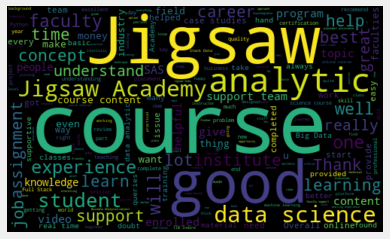

In [12]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['entries_review']])
allWords = allWords.replace('\n','')
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110,stopwords=STOPWORDS).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [13]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,entries_review,Subjectivity,Polarity,Analysis
0,I enrolled myself for Product Management PG ce...,0.578571,0.428571,Positive
1,In order to explain my experience of this cour...,0.518340,0.145315,Positive
2,Jigsaw is good platform to excel your career a...,0.348333,0.483333,Positive
3,I had enrolled for IPBA course in collaboratio...,0.570990,0.253133,Positive
4,This course gives a great understanding of dif...,0.530357,0.284722,Positive
...,...,...,...,...
525,"Yes, there are quite a few good institutes tha...",0.448352,0.192857,Positive
526,Well on the counter part i see below grievance...,0.512847,0.090104,Positive
527,Jigsaw Academy teaches online courses in Data ...,0.600000,0.300000,Positive
528,I am currently enrolled to their Full Stack Da...,0.539167,0.065833,Positive


In [14]:
print('Printing positive Content:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['entries_review'][i])
    print()
    j= j+1

Printing positive Content:

1) I enrolled myself for Product Management PG certification and I must say that my learning has been nothing short of great. The curriculum has been one of a kind which enables working professionals to scale up and develop the skills required to go a notch above. This experience has been truly world class. I recommend this curriculum to all who are looking to learn the mantra of becoming a problem solver. The student support has been impeccable and available whenever needed.

2) In order to explain my experience of this course i've breakdown my review into 5 major categories.
1) Quality and quantity
2) Student background and pace of course
3) Online and in-person class
4) Assignment and grading system
5) Student and mentor relation
So, first i'd like to emphasis on the part that due to COVID-19 situation I was not able to grab full extent of this program. And my batch suffered with the same circumstances.
without any delay lets pick the first point "Quality

In [15]:
# Printing negative comment  
print('Printing negative Content:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['entries_review'][i])
    print()
    j=j+1

Printing negative Content:

1) These people are totally fake and all the comments here are wrong these people promises to give placements but after cource completion these people never going to contact you and at the time of certificate these acadamy wants you to give positive feedback thats why these review are always positive dont do cources from jigsaw academy.

2) One of the worst online education service provider. I was ensured on-time faculty support when I bought the course (HR analytics). No one responds to your query and their customer support only responds if they have a potential new customer. Money minded and unprofessional.
DONT WASTE YOUR HARD EARNED MONEY HERE!!

3) WORST PLACEMENT ASSISTANCE AND CAREER. DON'T TRUST THE WORDS WHAT THEY SAY WHILE TAKING ADMISSION.

4) I had enrolled for pyspark with ML course. The course costed around 20K INR, on purchase i observed that the course hardly had any content on ML with just 4 basic videos on basics of ML. I had contacted the 

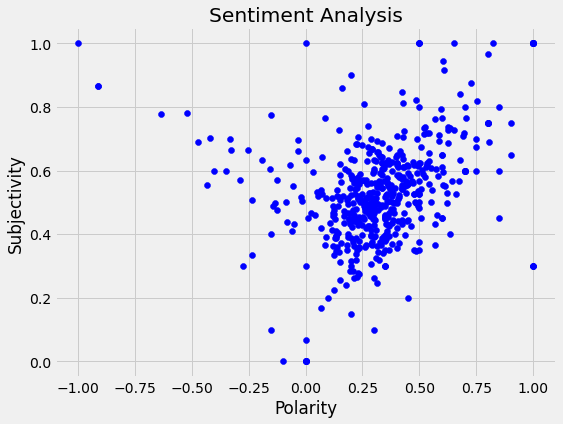

In [16]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [17]:
# Print the percentage of positive comments
pcomments = df[df.Analysis == 'Positive']
pcomments = pcomments['entries_review']
pcomments

round( (pcomments.shape[0] / df.shape[0]) * 100 , 1)

91.3

In [18]:
# Print the percentage of negative comments
pcomments = df[df.Analysis == 'Negative']
pcomments = pcomments['entries_review']
pcomments

round( (pcomments.shape[0] / df.shape[0]) * 100 , 1)

7.0

In [19]:
# Show the value counts
df['Analysis'].value_counts()

Positive    484
Negative     37
Neutral       9
Name: Analysis, dtype: int64

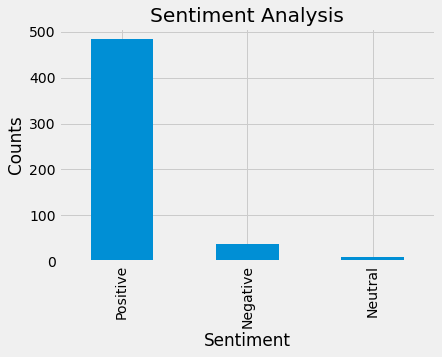

In [20]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

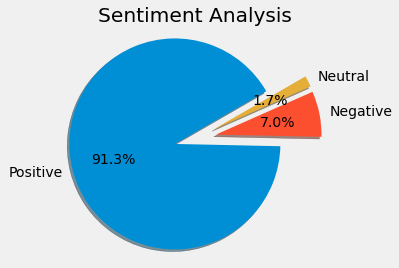

In [21]:
plt.style.use("fivethirtyeight")
labels = ['Positive', 'Negative', 'Neutral']
explode = [0.2, 0.2, 0.2]

plt.pie(df['Analysis'].value_counts(), autopct='%1.1f%%',labels=labels, explode=explode, startangle=30, shadow = True)
plt.title("Sentiment Analysis")
plt.axis('equal')
plt.show()

In [22]:
df.to_excel("reviews_cleaned.xlsx") 